In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import process_SMHI_data as process_data
import meteorological_temporal_data as metdata
import seaborn as sns

# Read in and clean data

In [11]:
# def a plot function
def plot_function(df, rows, cols, fig_size,  y_labels, fig_path = None, savefig = False):
    fig, axes = plt.subplots(rows, cols, constrained_layout = True, figsize = fig_size)
    annots = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(i)', '(j)']

    j = 0
    for i, ax in enumerate(fig.axes):
        df.iloc[:, j].plot(ax = ax, linewidth = .85) # linewidth default = 1.5
        ax.set_ylabel(y_labels)
        ax.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=2, borderaxespad=0.1)
        ax.annotate(annots[i], xy=(0.0, 1.09), xycoords="axes fraction")
        ax.set_xlabel('')
        j += 1
    if savefig:
        plt.savefig(fig_path)

In [12]:
# read in data and clean with import script
df = process_data.clean_and_merge_dframes('../air_weather_data/O3/')

In [13]:
# stations was misspelled in SMHI data
df.rename(columns={'O$_3$, Stockholm Torkel Knutssongatan':'O$_3$, Stockholm Torkel Knutssonsgatan'}, 
               inplace=True)

In [14]:
df.describe().round(3)

,"O$_3$, Norr Malma","O$_3$, Stockholm Torkel Knutssonsgatan"
count,61244.000,60875.000
mean,53.764,53.304
std,20.702,21.326
min,0.553,0.100
25%,39.900,39.000
50%,54.400,53.100
75%,68.000,67.100
max,147.800,155.200


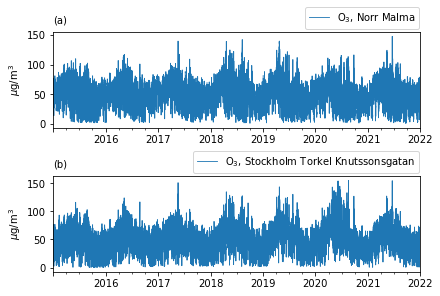

In [15]:
# plot raw PM10 data
plot_function(df, 2, 1, fig_size=(6,4), y_labels='$\mu$g/m$^3$')

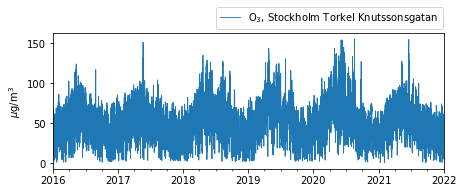

In [16]:
# plot only Torkel Knutssonsgatan station data
df['O$_3$, Stockholm Torkel Knutssonsgatan']['2016-01-01 00:00:00':].plot(linewidth=.85, figsize=(7,2.5))
plt.ylabel('$\mu$g/m$^3$'), plt.xlabel('')
plt.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=2, borderaxespad=0.1)

In [18]:
# check zero or outlier values
np.sum(df <0) 

O$_3$, Norr Malma                         0
O$_3$, Stockholm Torkel Knutssonsgatan    0
dtype: int64

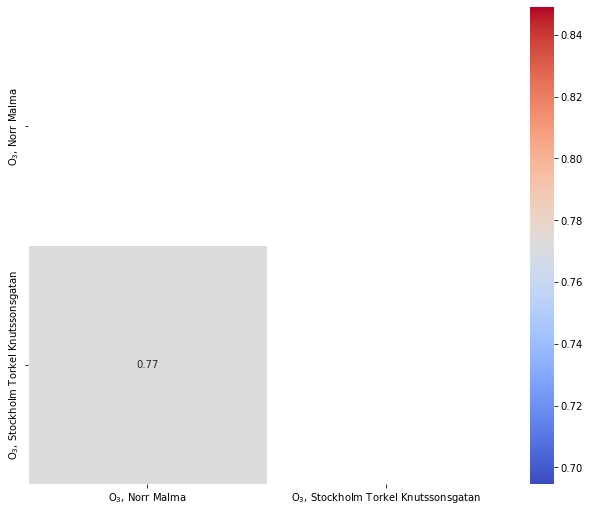

In [19]:
mat = df.corr()
mask = np.triu(np.ones_like(mat, dtype=bool))
fig, ax = plt.subplots(figsize = (8,7), constrained_layout = True)
ax = sns.heatmap(mat, mask=mask, annot = True, linewidths=0.5, fmt = ".2f", square=True, cmap='coolwarm')

In [20]:
# save cleaned dataframe
df.to_csv('../air_weather_data/O3_all_stations_cleaned.csv')